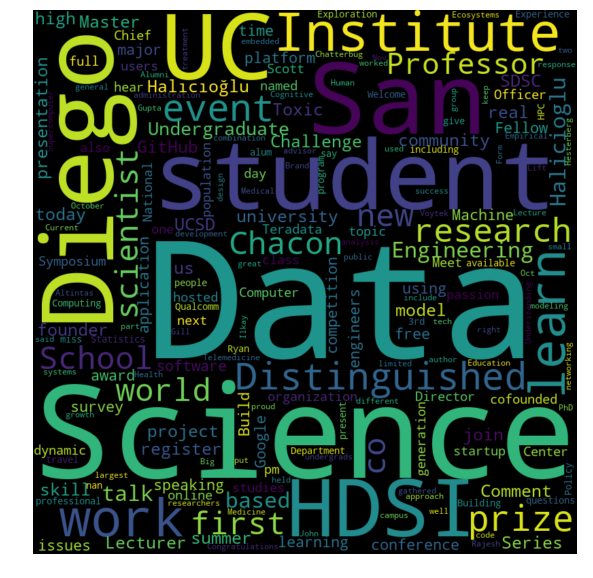

In [1]:
from PIL import Image
from PIL import ImageFilter
image = Image.open("data/HDSI.png")
display(image)

# Introduction to Image Processing

Credit: Colin Jemmott

### Description

In today's lecture, "Images are Data!" you learned that raster images are a esentially just arrays of numbers, and that these numbers can be manipulated to modify the image.  In this project we will use `Pillow` (a fork of the Python Image Library) and `numpy` to open, display,and manipulate images.


### Note

This notebook uses [pillow](https://pillow.readthedocs.io/en/latest/).  It should already be installed in your environment, but if not you can install it:
```
! pip install Pillow
```

### References

* http://paulbourke.net/dataformats/bitmaps/

## Step 1: Open and Display

In [9]:
from PIL import Image
from PIL import ImageFilter

In [10]:
image = Image.open("data/test.bmp")

In [11]:
display(image)

## Step 2: Scale

Hmmm, that looks very small.  Let's make sure it is, and then scale it up.

In [12]:
image.size

(8, 4)

In [13]:
# this function prints a larger version of the image!
def printLargeImage(smallImage):
    maxsize = tuple([50*x for x in smallImage.size])
    largeImage = smallImage.resize(maxsize, resample=Image.NEAREST)
    display(largeImage)
    return

/var/folders/mq/dld2xltx543g5mrsjg8cpbq40000gp/T/ipykernel_11041/1649783684.py:4: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  largeImage = smallImage.resize(maxsize, resample=Image.NEAREST)


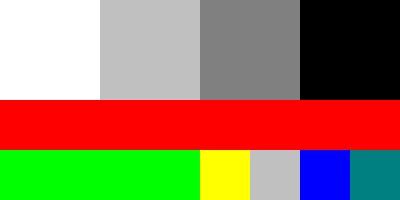

In [14]:
printLargeImage(image)

## Step 3: Let's look at the data!

In [15]:
import numpy as np

# let's look at how is the image made!
imageData = np.array(image)
imageData[:,:,0]



array([[255, 255, 192, 192, 128, 128,   0,   0],
       [255, 255, 192, 192, 128, 128,   0,   0],
       [255, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0,   0,   0, 255, 192,   0,   0]], dtype=uint8)

## Step 4: Manipulating the Image 
### get rid of the RED line!

Ok, take a good look at the `test.bmp` image and the resulting array above.  Can you figure out how the numbers map to the image?  

*Hint*:
* The image is 8 pixels by 4 pixels
* For each pixel there are 3 color intensities (RGB)

Once you figure the mapping between the array and the image, write some code that will remove all of the red from that image.  Then display it to verify (it should have no red!).

/var/folders/mq/dld2xltx543g5mrsjg8cpbq40000gp/T/ipykernel_11041/1649783684.py:4: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  largeImage = smallImage.resize(maxsize, resample=Image.NEAREST)


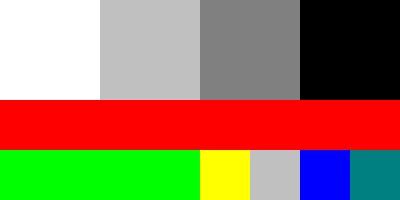

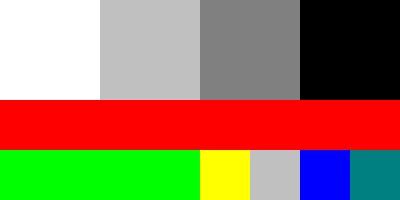

In [16]:
import copy

# this is our previous image
printLargeImage(image)

# this is a separate copy of image data (so we never modify the original one)
imageData2 = copy.deepcopy(imageData)

# Your code goes here:




image2 = Image.fromarray(imageData2)
printLargeImage(image2)

## Project 1: Bigger Image

Now that you have the basics down, let's start working with a larger image, `bear.jpg`.

The goal of this project is for you to get comfortable manipulating images in Python.  It is best to start by reviewing what is possible in the [Pillow documentation](https://pillow.readthedocs.io/en/latest/).  There are lots of fun things like making thumbnails, rotating, filters, cropping, layering, etc. This is an easy tutorial with some code ready to be used: [Pillow Tutorial](https://pillow.readthedocs.io/en/stable/handbook/tutorial.html).

Do at least three different types of modifications to `bear.jpg`! (can you make the bear look "scary"?)

Remember to comment all the code you write!

Original:


/var/folders/mq/dld2xltx543g5mrsjg8cpbq40000gp/T/ipykernel_11041/1649783684.py:4: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  largeImage = smallImage.resize(maxsize, resample=Image.NEAREST)


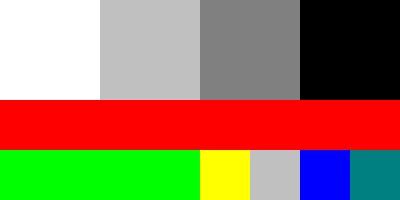

Region:


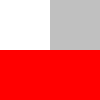

Modified:


/var/folders/mq/dld2xltx543g5mrsjg8cpbq40000gp/T/ipykernel_11041/1809882159.py:13: DeprecationWarning: ROTATE_180 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_180 instead.
  region = region.transpose(Image.ROTATE_180)


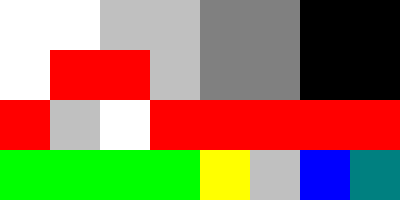

More modified:


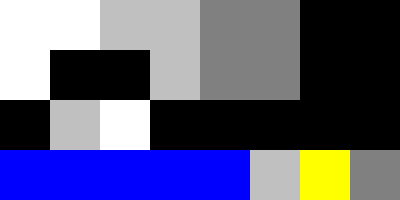

In [17]:
# as an example, let's try with our first small image

print('Original:')
printLargeImage(image)

# crop the image:
box = (1, 1, 3, 3)
region = image.crop(box)
print('Region:')
printLargeImage(region)

# rotate part of the image!
region = region.transpose(Image.ROTATE_180)
image2 = image
image2.paste(region, box)
print('Modified:')
printLargeImage(image2)

# change colors
r, g, b = image2.split()
temp = Image.merge("RGB", (b, b, g))
print('More modified:')
printLargeImage(temp)

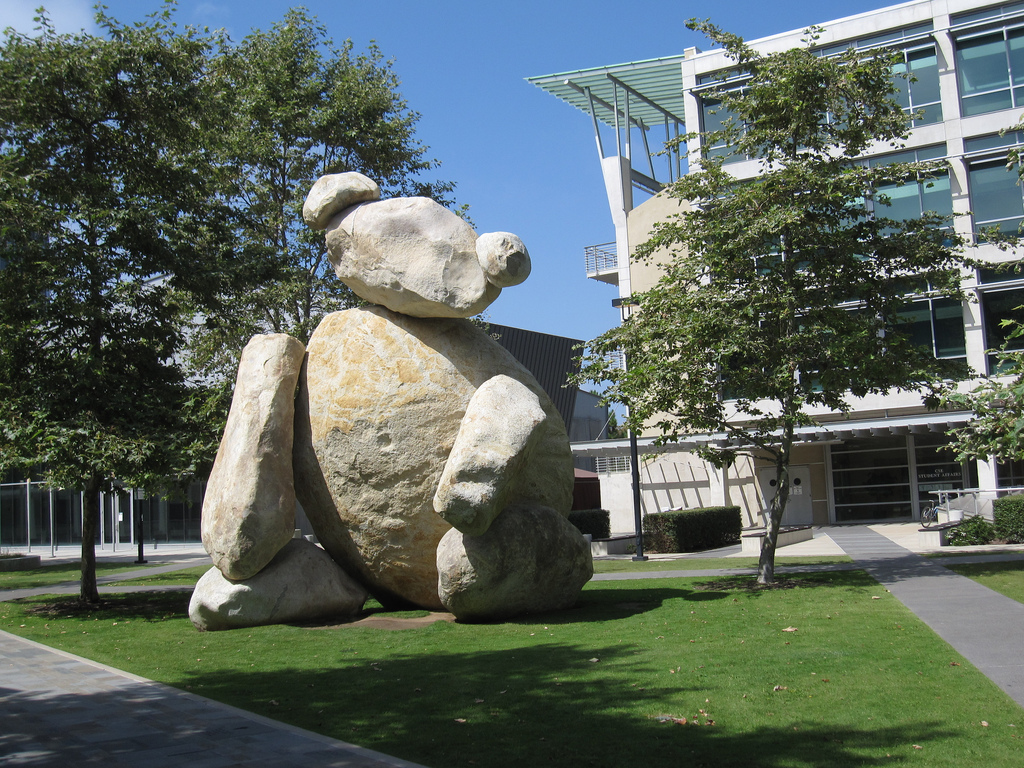

In [18]:
bear = Image.open('data/bear.jpg')
display(bear)

In [19]:
# Add your code here



# Project 2: Edge Detection

Begin with the twitter logo image `data/twitter.png`, then try it on `data/bear.jpg` from above.

## Goal

For this project you will implement a very basic edge detection algorithm by following these steps:

1. Convert the image to grayscale
2. Take the spatial gradient of the image
3. Apply a threshold to the gradient
4. Convert the result back to an image and display it

## Note

Edge detection is an active area of research with some pretty impressive algorithms.  This one is extremely simple, and so the results are only ok.

After you finish this, you might enjoy reading the Wikipedia article on [Edge Detection](https://en.wikipedia.org/wiki/Edge_detection).

## Hints

* The `.convert('L')` method translates the image to grayscale.
* There are many different ways to solve this problem, but using [`numpy.gradient`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.gradient.html) will make it much easier.
    - gradient outputs the differences between the pixels in the horizontal and vertical directions.
    
## Do not limit yourself to these images!
* Download the image you want from the Internet
* Try your code !

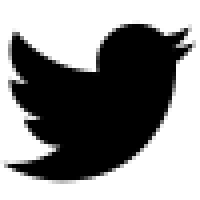

(200, 200)
<class 'list'>
(2, 200, 200)
(200, 200)
-116.5
126.5
-230.23715415019763
250.0
0
255


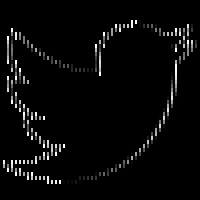

In [20]:
import numpy as np 
twitter = Image.open('data/twitter.bmp')
display(twitter)

# how does it look like in numpy?
twitterData = np.array(twitter)
print(twitterData.shape)

# notice that it is a 2D matrix (not a 3D) -> it is already in grayscale!


# let's calculate the gradient from the 2D matrix
twitterGradient = np.gradient(twitterData)
print(type(twitterGradient)) # wait, this is a list!
print(np.shape(np.array(twitterGradient))) # wrong dimensionality

# ok, let's just look at the gradient on axis 1
twitterGradient = np.gradient(twitterData, axis=1)
twitterGradient = np.array(twitterGradient)
print(np.shape(twitterGradient)) # ok dimensionality

# let's check how it looks like
print(np.min(twitterGradient))
print(np.max(twitterGradient))

# let's make it more "extreme" -> max to 250 !
twitterGradient *= 250./np.max(twitterGradient)

# let's check how it looks like
print(np.min(twitterGradient))
print(np.max(twitterGradient))

# these values must be integers! attention that .astype does not change the format of the image in place
twitterGradient = twitterGradient.astype('uint8')

# let's check how it looks like
print(np.min(twitterGradient))
print(np.max(twitterGradient))

imageEdges = Image.fromarray(twitterGradient)

display(imageEdges)

# NEXT: do it for the bear !
# better to use: graybear = bear.convert('L')
# can you merge axis=0  and axis=1, to get better results? (try with twitter first!)


# Stretch Project: Image Processing From Scratch

First, don't worry if you don't complete all (or any) of this - this section is a stretch goal and different students come in to this class with very different levels of programming.

### Project Goal

Write your own Instagram filter!

The plot below shows histograms of the RGB colorspace.  Think about how you might manipulate the pixels to change those histograms and "enhance" your favorite photo.

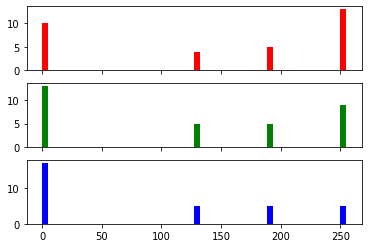

In [21]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

num_bins = 50

fig, ax = plt.subplots(3, sharex=True)

# the histogram of the data
n, bins, patches = ax[0].hist(imageData[:,:,0].flatten(), num_bins, color="red")
n, bins, patches = ax[1].hist(imageData[:,:,1].flatten(), num_bins, color="green")
n, bins, patches = ax[2].hist(imageData[:,:,2].flatten(), num_bins, color="blue")

plt.show()